In [3]:
import numpy as np
import pandas as pd
import requests
import json
import tweepy
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
from matplotlib import cm

# Importing Data 
## 1 - Twitter Archive Data.csv
## 2 -  Image Prediction.tsv
## 3 - Download Data From twitter Using API and Store it as Json File


In [4]:
df_twitter=pd.read_csv("twitter-archive-enhanced.csv")

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)

In [7]:
df_image_pre = pd.read_csv('image-predictions.tsv', sep = '\t')

In [8]:
tweets_ids = df_twitter['tweet_id']
list(tweets_ids)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [9]:
# Authentication process and Creating an api object         
consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [10]:
#Ref:GitHub 
# Twitter API - get tweets with specific id and retrive favorites count and retweet count.
df_list = []
#the tweet ids of all the tweets that don't exist anymore .
del_ids = []

for id in tweets_ids:
    try:
        page = api.get_status(id, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    
    except Exception as e:
        del_ids.append(id)

892420643555336193 35502 7497
892177421306343426 30727 5564
891815181378084864 23105 3684
891689557279858688 38796 7679
891327558926688256 37060 8284
891087950875897856 18686 2774
890971913173991426 10859 1800
890729181411237888 59849 16796
890609185150312448 25704 3825
890240255349198849 29361 6520
890006608113172480 28274 6523
889880896479866881 25733 4440
889665388333682689 44226 8902
889638837579907072 24869 3978
889531135344209921 13980 2010
889278841981685760 23208 4743
888917238123831296 26823 3994
888804989199671297 23544 3768
888554962724278272 18164 3077
888078434458587136 20067 3089
887705289381826560 27895 4801
887517139158093824 42726 10487
887473957103951883 63287 16009
887343217045368832 31031 9367
887101392804085760 28234 5313
886983233522544640 32088 6811
886736880519319552 11012 2837
886680336477933568 20733 3987
886366144734445568 19468 2816
886267009285017600 110 4
886258384151887873 25780 5632
886054160059072513 0 97
885984800019947520 29996 5981
885528943205470208

838083903487373313 17325 3046
837820167694528512 33461 7668
837482249356513284 3800 435
837471256429613056 12579 2219
837110210464448512 15773 2310
836989968035819520 12545 2250
836753516572119041 19041 4544
836677758902222849 12433 2180
836648853927522308 0 541
836397794269200385 0 26886
836380477523124226 14533 2926
836260088725786625 20980 4215
836001077879255040 18787 4169
835685285446955009 0 7960
835574547218894849 17517 3542
835536468978302976 0 1655
835309094223372289 0 20480
835297930240217089 16223 2939
835264098648616962 7606 1655
835246439529840640 2062 72
835172783151792128 25781 5645
835152434251116546 22038 2939
834931633769889797 10638 1597
834786237630337024 21104 5395
834574053763584002 13448 2471
834477809192075265 0 10431
834458053273591808 9492 1642
834209720923721728 20273 4645
834167344700198914 15602 3587
834089966724603904 9896 2093
834086379323871233 12873 2166
833863086058651648 13249 2363
833826103416520705 17835 3704
833732339549220864 0 219
833722901757046

800388270626521089 11159 2809
800188575492947969 0 3944
800141422401830912 15292 2550
800018252395122689 28386 13155
799774291445383169 0 4682
799757965289017345 8399 2172
799422933579902976 8080 1928
799308762079035393 0 5461
799297110730567681 9881 2755
799063482566066176 8084 2478
798933969379225600 13089 4454
798925684722855936 7520 1441
798705661114773508 0 6644
798701998996647937 0 7772
798697898615730177 0 6522
798694562394996736 0 4948
798686750113755136 0 2336
798682547630837760 0 4744
798673117451325440 0 5557
798665375516884993 0 3905
798644042770751489 0 1854
798628517273620480 0 1978
798585098161549313 0 5683
798576900688019456 0 5836
798340744599797760 0 3334
798209839306514432 10438 2566
797971864723324932 11592 3109
797545162159308800 14568 4875
797236660651966464 19979 6569
797165961484890113 226 26
796904159865868288 0 8919
796865951799083009 7685 1927
796759840936919040 11828 3028
796563435802726400 0 7252
796484825502875648 7581 1760
796387464403357696 11003 4131
79

761371037149827077 0 17786
761334018830917632 5136 1433
761292947749015552 4432 1072
761227390836215808 5262 1545
761004547850530816 11186 3430
760893934457552897 3767 958
760656994973933572 6510 1882
760641137271070720 4921 1277
760539183865880579 7468 3561
760521673607086080 4163 1369
760290219849637889 26464 11286
760252756032651264 3902 857
760190180481531904 5625 1770
760153949710192640 0 30
759943073749200896 5878 2043
759923798737051648 14503 5558
759846353224826880 6650 1934
759793422261743616 5875 1876
759557299618865152 4626 1168
759447681597108224 8370 2421
759446261539934208 1650 478
759197388317847553 5996 1913
759159934323924993 0 1135
759099523532779520 14320 4090
759047813560868866 6409 1976
758854675097526272 3506 884
758828659922702336 11064 3775


Rate limit reached. Sleeping for: 366


758740312047005698 5667 1593
758474966123810816 3750 987
758467244762497024 4730 2177
758405701903519748 5141 1877
758355060040593408 3345 1042
758099635764359168 18800 9802
758041019896193024 2663 368
757741869644341248 6782 3198
757729163776290825 0 7762
757725642876129280 4477 1191
757611664640446465 4503 1090
757597904299253760 0 296
757596066325864448 4264 1038
757400162377592832 14918 6730
757393109802180609 5730 1708
757354760399941633 4463 1397
756998049151549440 6186 1954
756939218950160384 6549 1968
756651752796094464 4971 1275
756526248105566208 10263 3510
756303284449767430 3874 1089
756288534030475264 43389 17380
756275833623502848 6312 1505
755955933503782912 7204 2828
755206590534418437 16188 5261
755110668769038337 20881 10890
754874841593970688 0 7759
754856583969079297 6810 2469
754747087846248448 2550 511
754482103782404096 5211 1919
754449512966619136 3686 722
754120377874386944 7772 2317
753655901052166144 5756 2133
753420520834629632 7781 3487
753398408988139520 5

718540630683709445 2387 985
718460005985447936 2629 510
718454725339934721 4736 1471
718246886998687744 1862 481
718234618122661888 3771 959
717841801130979328 2390 588
717790033953034240 2800 1071
717537687239008257 5618 1787
717428917016076293 1577 433
717421804990701568 3079 814
717047459982213120 6123 1866
717009362452090881 3153 935
716802964044845056 4174 1136
716791146589110272 7977 1529
716730379797970944 1201 415
716447146686459905 12698 5677
716439118184652801 2322 203
716285507865542656 2698 1014
716080869887381504 6599 1847
715928423106027520 3114 853
715758151270801409 3624 1385
715733265223708672 4544 1639
715704790270025728 2710 554
715696743237730304 3816 1254
715680795826982913 4179 1560
715360349751484417 5324 1514
715342466308784130 2971 668
715220193576927233 2364 629
715200624753819648 5008 1817
715009755312439296 4043 1187
714982300363173890 3635 1006
714962719905021952 7162 4122
714957620017307648 4036 1368
714631576617938945 3197 962
714606013974974464 3535 900


693642232151285760 2483 402
693629975228977152 2391 774
693622659251335168 1504 362
693590843962331137 4932 1900
693582294167244802 1608 239
693486665285931008 1732 616
693280720173801472 3276 1205
693267061318012928 2327 791
693262851218264065 2157 484
693231807727280129 2810 721
693155686491000832 7709 3130
693109034023534592 1673 594
693095443459342336 1811 446
692919143163629568 2620 733
692905862751522816 2372 847
692901601640583168 1721 587
692894228850999298 2211 775
692828166163931137 2803 862
692752401762250755 6660 3539
692568918515392513 4263 1492
692535307825213440 3084 1325
692530551048294401 1792 403
692423280028966913 1445 220
692417313023332352 9154 3362
692187005137076224 2476 791
692158366030913536 2102 769
692142790915014657 1610 384
692041934689402880 3321 1234
692017291282812928 2825 927
691820333922455552 3873 1604
691793053716221953 7960 4112
691756958957883396 2781 969
691675652215414786 1911 495
691483041324204033 2329 549
691459709405118465 3958 1110
691444869

678424312106393600 5303 2442
678410210315247616 4067 1733
678399652199309312 77590 30646
678396796259975168 1547 399
678389028614488064 1809 405
678380236862578688 2356 870
678341075375947776 1678 513
678334497360859136 1260 237
678278586130948096 11060 5852
678255464182861824 1533 350
678023323247357953 1851 365
678021115718029313 13166 6077
677961670166224897 3306 1617
677918531514703872 1292 390
677895101218201600 4646 1985
677716515794329600 2944 942
677700003327029250 3270 1392
677698403548192770 1189 308
677687604918272002 2414 809
677673981332312066 3217 1441
677662372920729601 1880 910
677644091929329666 1792 773
677573743309385728 2061 674
677565715327688705 1258 442
677557565589463040 2372 1108
677547928504967168 6700 3526
677530072887205888 1031 220
677335745548390400 2933 1691
677334615166730240 1299 274
677331501395156992 1048 227
677328882937298944 3519 1441
677314812125323265 1585 514
677301033169788928 1186 388
677269281705472000 1907 678
677228873407442944 3431 1572
67

Rate limit reached. Sleeping for: 383


676975532580409345 2664 1021
676957860086095872 2163 778
676949632774234114 1255 379
676948236477857792 2077 826
676946864479084545 1672 351
676942428000112642 1996 715
676936541936185344 12256 4744
676916996760600576 2861 1732
676897532954456065 2165 700
676864501615042560 2009 672
676821958043033607 22044 14863
676819651066732545 1749 634
676811746707918848 1372 409
676776431406465024 4807 1939
676617503762681856 2764 914
676613908052996102 1036 192
676606785097199616 1826 414
676603393314578432 1117 366
676593408224403456 4380 2055
676590572941893632 885 116
676588346097852417 2217 746
676582956622721024 1146 262
676575501977128964 2470 1066
676533798876651520 1804 525
676496375194980353 1465 509
676470639084101634 11156 4467
676440007570247681 1653 630
676430933382295552 1342 323
676263575653122048 2000 515
676237365392908289 1158 271
676219687039057920 73479 29632
676215927814406144 1663 550
676191832485810177 2186 988
676146341966438401 1845 633
676121918416756736 2077 1113
67610

670778058496974848 316 69
670764103623966721 1023 391
670755717859713024 414 98
670733412878163972 905 475
670727704916926465 785 331
670717338665226240 1116 446
670704688707301377 729 345
670691627984359425 555 224
670679630144274432 707 261
670676092097810432 230 38
670668383499735048 10068 4657
670474236058800128 1419 687
670468609693655041 338 82
670465786746662913 918 507
670452855871037440 518 189
670449342516494336 1141 604
670444955656130560 6349 1854
670442337873600512 609 186
670435821946826752 998 479
670434127938719744 1333 600
670433248821026816 311 103
670428280563085312 1309 575
670427002554466305 491 148
670421925039075328 1231 593
670420569653809152 581 292
670417414769758208 537 302
670411370698022913 1899 827
670408998013820928 523 204
670403879788544000 405 142
670385711116361728 531 191
670374371102445568 704 250
670361874861563904 309 60
670338931251150849 404 101
670319130621435904 3670 1135
670303360680108032 408 123
670290420111441920 656 266
670093938074779648

In [11]:
len(df_list)

2331

In [12]:
del_ids

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [13]:
df_twitter_json = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])

In [90]:
df_twitter_json.to_csv('tweet_json.txt',encoding='utf-8',index=False)

In [91]:
df_twitter_json.head()

,tweet_id,favorites,retweet_count
0,892420643555336193,35502,7497
1,892177421306343426,30727,5564
2,891815181378084864,23105,3684
3,891689557279858688,38796,7679
4,891327558926688256,37060,8284


# Assessessing 



In [15]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
df_twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [17]:
df_twitter.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [18]:
df_twitter.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Chubbs         1
Dwight         1
Jomathan       1
Genevieve      1
DayZ           1
Name: name, Length: 957, dtype: int64

In [19]:
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

 in correct data type The denominator and must be equal 10 

In [21]:
df_twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
df_twitter.duplicated().sum()

0

In [23]:
df_image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_image_pre.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [25]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Quality

- 1-  incorrect data type : timestamp
- 2- Five columns is mostly have null values( col #1,2,6,7,8).
- 3- Fix nondescriptive column headers (p1 , p1_conf,etc).
- 4- Source column is unreadable.
- 5- There are 181 retweet and 78 reply we do't need them for this analysis.
- 6- more than 745 dogs have been assigned the name as None/a.
- 7- inaccurate data and incorrect data type in rating  rating numerator.
- 8- inaccurate data and incorrect data type in rating denominator.
- 9- changing the values in confidence level  to percentages

## Tidiness
- 1- Doggo, puppo, etc. should be placed in one column because these are the same categorical data
- 2- we should add favourate count into twitter data
- 3- we should also merge image prediction file too
- 4- Dogs name has Underscores that makes data untidy

# Cleaning

In [26]:
twitter_clean_df = df_twitter.copy()
image_clean_df = df_image_pre.copy()

## Define
- 1-  incorrect data type : timestamp must be a datetime 

## Code

In [27]:
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
twitter_clean_df.timestamp = pd.to_datetime(twitter_clean_df.timestamp, yearfirst = True)


## Test

In [29]:
twitter_clean_df.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

In [30]:
twitter_clean_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## Define
- 2- Five columns is mostly have null values( col #1,2,6,7,8).
- 3- There are 181 retweet and 78 reply we do't need them for this analysis.


## Code

In [31]:
twitter_clean_df = twitter_clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp'], axis = 1)

## Test

In [32]:
twitter_clean_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [33]:
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

## Define

- 4- we should merge df_twitter_json[ favourate count] into twitter data.
- 5- we should also merge image prediction with twitter file too. but first drop['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'] since are not important.
- 6- Rename Columns



## Code

In [34]:
twitter_clean_df = pd.merge(twitter_clean_df, df_twitter_json, on=['tweet_id','tweet_id'],how='left')

In [35]:
image_clean_df=image_clean_df.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

In [36]:
image_clean_df=image_clean_df.rename(columns = { 'jpg_url': 'image_link', 'p1':'dog_breed',
                                                'p1_conf': 'confidence_percentage'})

In [37]:
twitter_clean_df = twitter_clean_df.merge(image_clean_df, on = 'tweet_id', how = 'inner')

In [38]:
twitter_clean_df = twitter_clean_df.rename(columns = {
                           'source': 'tweet_source',
                           'text': 'tweet_text',
                           'expanded_urls': 'tweet_url',
                           'rating_numerator': 'dog_score',
                           'rating_denominator':'out_of',
                           'name': 'dog_name',
                           'p1_dog':'Dog_prediction'})

## Test

In [39]:
image_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2075 non-null   int64  
 1   image_link             2075 non-null   object 
 2   dog_breed              2075 non-null   object 
 3   confidence_percentage  2075 non-null   float64
 4   p1_dog                 2075 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 67.0+ KB


In [40]:
image_clean_df.head(3)

,tweet_id,image_link,dog_breed,confidence_percentage,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True


In [41]:
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2075 non-null   int64              
 1   timestamp              2075 non-null   datetime64[ns, UTC]
 2   tweet_source           2075 non-null   object             
 3   tweet_text             2075 non-null   object             
 4   tweet_url              2075 non-null   object             
 5   dog_score              2075 non-null   int64              
 6   out_of                 2075 non-null   int64              
 7   dog_name               2075 non-null   object             
 8   doggo                  2075 non-null   object             
 9   floofer                2075 non-null   object             
 10  pupper                 2075 non-null   object             
 11  puppo                  2075 non-null   object           

In [42]:
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2075 non-null   int64              
 1   timestamp              2075 non-null   datetime64[ns, UTC]
 2   tweet_source           2075 non-null   object             
 3   tweet_text             2075 non-null   object             
 4   tweet_url              2075 non-null   object             
 5   dog_score              2075 non-null   int64              
 6   out_of                 2075 non-null   int64              
 7   dog_name               2075 non-null   object             
 8   doggo                  2075 non-null   object             
 9   floofer                2075 non-null   object             
 10  pupper                 2075 non-null   object             
 11  puppo                  2075 non-null   object           

## Define
- 7- Create a new column named doy_type and change the datatype into category.

In [43]:
twitter_clean_df.head()

,tweet_id,timestamp,tweet_source,tweet_text,tweet_url,dog_score,out_of,dog_name,doggo,floofer,pupper,puppo,favorites,retweet_count,image_link,dog_breed,confidence_percentage,Dog_prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,35502.0,7497.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,30727.0,5564.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,23105.0,3684.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,38796.0,7679.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,37060.0,8284.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True


## Code

In [44]:

twitter_clean_df['dog_type'] = twitter_clean_df.tweet_text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

twitter_clean_df.dog_type = twitter_clean_df.dog_type.str.strip()

In [45]:
twitter_clean_df = twitter_clean_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)


In [46]:
twitter_clean_df.dog_type = twitter_clean_df.dog_type.astype('category')

In [47]:
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2075 non-null   int64              
 1   timestamp              2075 non-null   datetime64[ns, UTC]
 2   tweet_source           2075 non-null   object             
 3   tweet_text             2075 non-null   object             
 4   tweet_url              2075 non-null   object             
 5   dog_score              2075 non-null   int64              
 6   out_of                 2075 non-null   int64              
 7   dog_name               2075 non-null   object             
 8   favorites              2059 non-null   float64            
 9   retweet_count          2059 non-null   float64            
 10  image_link             2075 non-null   object             
 11  dog_breed              2075 non-null   object           

In [48]:
twitter_clean_df.head()

,tweet_id,timestamp,tweet_source,tweet_text,tweet_url,dog_score,out_of,dog_name,favorites,retweet_count,image_link,dog_breed,confidence_percentage,Dog_prediction,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,35502.0,7497.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,30727.0,5564.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,23105.0,3684.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,38796.0,7679.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,37060.0,8284.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,NaN


## Define 
- 8- Source column is unreadable

## Code

In [49]:
twitter_clean_df.tweet_source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2034
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: tweet_source, dtype: int64

### the tweet_source Column has 3 different values 

In [50]:
a = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
b = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
c = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [51]:
twitter_clean_df.tweet_source = twitter_clean_df.tweet_source.replace(a, 'Twitter for iPhone')
twitter_clean_df.tweet_source = twitter_clean_df.tweet_source.replace(b, 'Twitter Web Client')
twitter_clean_df.tweet_source = twitter_clean_df.tweet_source.replace(c, 'TweetDeck Application')

## Test

In [52]:
twitter_clean_df.tweet_source.value_counts()

Twitter for iPhone       2034
Twitter Web Client         30
TweetDeck Application      11
Name: tweet_source, dtype: int64

## Define
- 9- Replace UnderScore feom dog Breed column and ake the firt litter capital 

## Code

In [53]:
twitter_clean_df.dog_breed = twitter_clean_df.dog_breed.str.replace('_', ' ')

In [54]:
twitter_clean_df.dog_breed = twitter_clean_df.dog_breed.str.title()

## Test

In [55]:
twitter_clean_df.dog_breed.value_counts()

Golden Retriever      150
Labrador Retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Lynx                    1
Dining Table            1
Carton                  1
Coral Reef              1
Picket Fence            1
Name: dog_breed, Length: 378, dtype: int64

## Define
- 10- changing the values in confidence level  to percentages

## Code

In [56]:
twitter_clean_df.confidence_percentage = twitter_clean_df.confidence_percentage.apply(lambda x: round(x*100, 2))

## Test

In [57]:
twitter_clean_df.head(2)

,tweet_id,timestamp,tweet_source,tweet_text,tweet_url,dog_score,out_of,dog_name,favorites,retweet_count,image_link,dog_breed,confidence_percentage,Dog_prediction,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,35502.0,7497.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,9.70,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,30727.0,5564.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32.36,True,NaN


##  Define
- 11- Change dog Score and Out of Score data type
- 12- the describe() method shows us some quality issues(min is 0 for both and max is very big 1776,170)
 - So the out_of must be 10 and the score maybe it's value to be greater than 10

## Code

In [58]:
twitter_clean_df.dog_score = twitter_clean_df.dog_score.astype(float)
twitter_clean_df.out_of = twitter_clean_df.out_of.astype(float)

In [59]:
for col in twitter_clean_df.columns:
    twitter_clean_df['out_of'].values[:] = 10

## Test

In [60]:

twitter_clean_df[['dog_score', 'out_of']].describe()

,dog_score,out_of
count,2075.000000,2075.0
mean,12.266024,10.0
std,40.680299,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


In [61]:
twitter_clean_df.out_of.value_counts()

10.0    2075
Name: out_of, dtype: int64

In [62]:
twitter_clean_df.dog_score.value_counts()

12.0      474
10.0      429
11.0      413
13.0      284
9.0       151
8.0        95
7.0        52
14.0       40
5.0        34
6.0        32
3.0        19
4.0        16
2.0         9
1.0         5
0.0         2
24.0        1
27.0        1
84.0        1
15.0        1
143.0       1
420.0       1
80.0        1
60.0        1
44.0        1
26.0        1
144.0       1
88.0        1
121.0       1
99.0        1
204.0       1
1776.0      1
45.0        1
165.0       1
75.0        1
50.0        1
Name: dog_score, dtype: int64

In [63]:
twitter_clean_df.out_of.describe()

count    2075.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: out_of, dtype: float64

In [64]:
twitter_clean_df.out_of.value_counts()

10.0    2075
Name: out_of, dtype: int64

## Define 
- replace the value 'None' and 'a' with the NaN 

In [65]:
twitter_clean_df.dog_name.value_counts()

None        578
a            55
Charlie      11
Lucy         10
Tucker       10
           ... 
Timison       1
Terrenth      1
Antony        1
Norman        1
DayZ          1
Name: dog_name, Length: 936, dtype: int64

## Code

In [66]:
twitter_clean_df =  twitter_clean_df.replace('None', np.nan)

In [67]:
twitter_clean_df =  twitter_clean_df.replace('a', np.nan)

##  Test

In [68]:
twitter_clean_df.dog_name.value_counts()

Charlie     11
Oliver      10
Cooper      10
Penny       10
Lucy        10
            ..
Pepper       1
Sephie       1
Cedrick      1
Rover        1
Terrenth     1
Name: dog_name, Length: 934, dtype: int64

In [69]:
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2075 non-null   int64              
 1   timestamp              2075 non-null   datetime64[ns, UTC]
 2   tweet_source           2075 non-null   object             
 3   tweet_text             2075 non-null   object             
 4   tweet_url              2075 non-null   object             
 5   dog_score              2075 non-null   float64            
 6   out_of                 2075 non-null   float64            
 7   dog_name               1442 non-null   object             
 8   favorites              2059 non-null   float64            
 9   retweet_count          2059 non-null   float64            
 10  image_link             2075 non-null   object             
 11  dog_breed              2075 non-null   object           

#  Storing Step

In [70]:
twitter_clean_df.to_csv('twitter_archive_master.csv', index = False)

In [71]:
df=pd.read_csv("twitter_archive_master.csv")

In [72]:
df.head()

,tweet_id,timestamp,tweet_source,tweet_text,tweet_url,dog_score,out_of,dog_name,favorites,retweet_count,image_link,dog_breed,confidence_percentage,Dog_prediction,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,35502.0,7497.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,9.70,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,30727.0,5564.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32.36,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,23105.0,3684.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,71.60,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,38796.0,7679.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,17.03,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,37060.0,8284.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,55.57,True,NaN


## ِAnalysis and visualizing The Data 

In [73]:
df.describe()

,tweet_id,dog_score,out_of,favorites,retweet_count,confidence_percentage
count,2.075000e+03,2075.000000,2075.0,2059.000000,2059.000000,2075.000000
mean,7.384514e+17,12.266024,10.0,7833.061195,2522.954347,59.454954
std,6.785203e+16,40.680299,0.0,11836.746333,4406.611565,27.117357
min,6.660209e+17,0.000000,10.0,0.000000,11.000000,4.430000
25%,6.764835e+17,10.000000,10.0,1489.500000,540.500000,36.440000
50%,7.119988e+17,11.000000,10.0,3454.000000,1193.000000,58.820000
75%,7.932034e+17,12.000000,10.0,9755.500000,2898.500000,84.385000
max,8.924206e+17,1776.000000,10.0,153077.000000,75806.000000,100.000000


- 1- The Top 10 Dogs Breed in the dataset

In [74]:
df.dog_breed.value_counts()

Golden Retriever      150
Labrador Retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Lynx                    1
Dining Table            1
Carton                  1
Coral Reef              1
Picket Fence            1
Name: dog_breed, Length: 378, dtype: int64

In [75]:
df.dog_breed.describe()

count                 2075
unique                 378
top       Golden Retriever
freq                   150
Name: dog_breed, dtype: object

### Golden Retriever Has most tweet and repeated 150 times

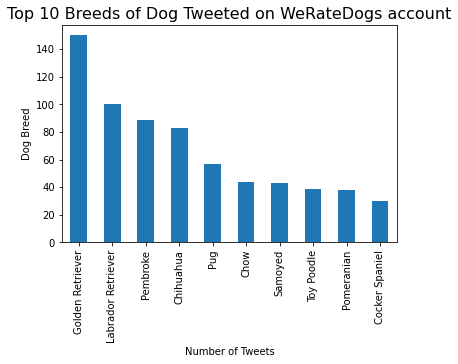

In [77]:
df.groupby('dog_breed').count()['dog_score'].nlargest(10).plot(kind='bar')
plt.title("Top 10 Breeds of Dog Tweeted on WeRateDogs account",fontsize=16)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets");

- 2- What dog breeds have the highest  favourite counts?


In [89]:
df.retweet_count.describe()


count     2059.000000
mean      2522.983487
std       4406.694845
min         11.000000
25%        540.500000
50%       1193.000000
75%       2898.500000
max      75810.000000
Name: retweet_count, dtype: float64

In [90]:
df.favorites.describe()


count      2059.000000
mean       7833.000486
std       11836.683261
min           0.000000
25%        1489.500000
50%        3454.000000
75%        9755.000000
max      153076.000000
Name: favorites, dtype: float64

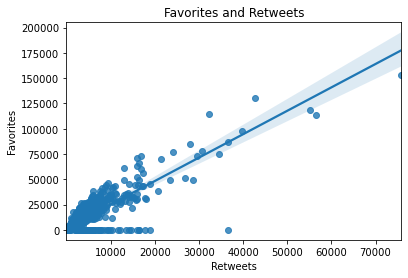

In [88]:
Img = sns.regplot(x=df.retweet_count, y=df.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = Img.get_figure()


- This graph shows a few things here, but the big picture is the strong positive correlation between the number of Retweets and the number of favorites. 

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2075 non-null   int64  
 1   timestamp              2075 non-null   object 
 2   tweet_source           2075 non-null   object 
 3   tweet_text             2075 non-null   object 
 4   tweet_url              2075 non-null   object 
 5   dog_score              2075 non-null   float64
 6   out_of                 2075 non-null   float64
 7   dog_name               1442 non-null   object 
 8   favorites              2059 non-null   float64
 9   retweet_count          2059 non-null   float64
 10  image_link             2075 non-null   object 
 11  dog_breed              2075 non-null   object 
 12  confidence_percentage  2075 non-null   float64
 13  Dog_prediction         2075 non-null   bool   
 14  dog_type               226 non-null    object 
dtypes: b

In [104]:
df.timestamp = pd.to_datetime(twitter_clean_df.timestamp, yearfirst = True)


### The Relationship between timeStamp and favorites  

<AxesSubplot:title={'center':'The Relationship between timeStamp and favorites '}, xlabel='timestamp'>

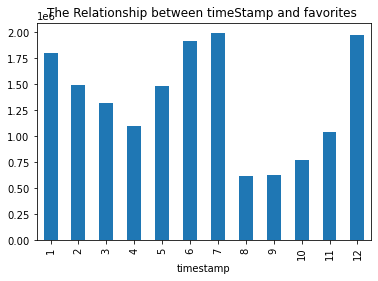

In [111]:
df_re1=df['favorites'].groupby(df['timestamp'].dt.month).sum()

df_re1.plot(kind="bar",title='The Relationship between timeStamp and favorites ')


In [89]:
# Total number of likes grouped by breed
x=df.groupby('dog_breed')['favorites'].sum()

AttributeError: 'Series' object has no attribute 'sort'

In [118]:
x

dog_breed
Acorn Squash           14356.0
Afghan Hound           46437.0
African Crocodile        867.0
African Grey            4749.0
African Hunting Dog     1548.0
                        ...   
Wood Rabbit             6719.0
Wooden Spoon           14533.0
Wool                    3353.0
Yorkshire Terrier      36799.0
Zebra                   1357.0
Name: favorites, Length: 378, dtype: float64

Text(0.5, 1.0, 'Most 3 Common Dog Breeds')

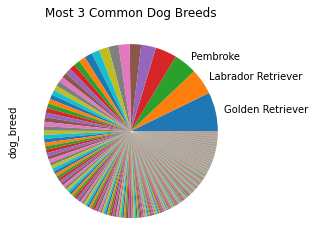

In [95]:
labels = np.full(len(df.dog_breed.value_counts()), '', dtype = object)

labels[0] = 'Golden Retriever'
labels[1] = 'Labrador Retriever'
labels[2] = 'Pembroke'

df.dog_breed.value_counts().plot(kind = 'pie', labels = labels)
plt.title('Most 3 Common Dog Breeds')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2075 non-null   int64  
 1   timestamp              2075 non-null   object 
 2   tweet_source           2075 non-null   object 
 3   tweet_text             2075 non-null   object 
 4   tweet_url              2075 non-null   object 
 5   dog_score              2075 non-null   float64
 6   out_of                 2075 non-null   float64
 7   dog_name               1442 non-null   object 
 8   favorites              2059 non-null   float64
 9   retweet_count          2059 non-null   float64
 10  image_link             2075 non-null   object 
 11  dog_breed              2075 non-null   object 
 12  confidence_percentage  2075 non-null   float64
 13  Dog_prediction         2075 non-null   bool   
 14  dog_type               226 non-null    object 
dtypes: b

In [97]:
df.Dog_prediction.describe()

count     2075
unique       2
top       True
freq      1532
Name: Dog_prediction, dtype: object

In [98]:
df.timestamp.describe()

count                          2075
unique                         2075
top       2016-01-09 03:40:16+00:00
freq                              1
Name: timestamp, dtype: object

In [99]:
df.dog_type.describe()

count        226
unique         4
top       pupper
freq         149
Name: dog_type, dtype: object

- the most dog type in this dataset is 'pupper' and repeted 149 times

In [100]:
df.confidence_percentage.describe()

count    2075.000000
mean       59.454954
std        27.117357
min         4.430000
25%        36.440000
50%        58.820000
75%        84.385000
max       100.000000
Name: confidence_percentage, dtype: float64

In [101]:
df.dog_name.describe()

count        1442
unique        934
top       Charlie
freq           11
Name: dog_name, dtype: object

- The most name for dog used in this dataset is 'Charlie' repeted 11 times